In [1]:
!pip install seaborn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('titanic.csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Univariate based on age

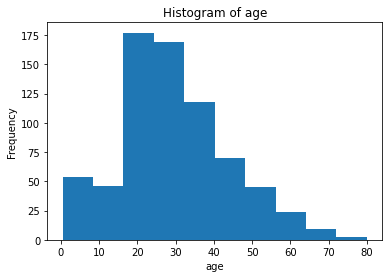

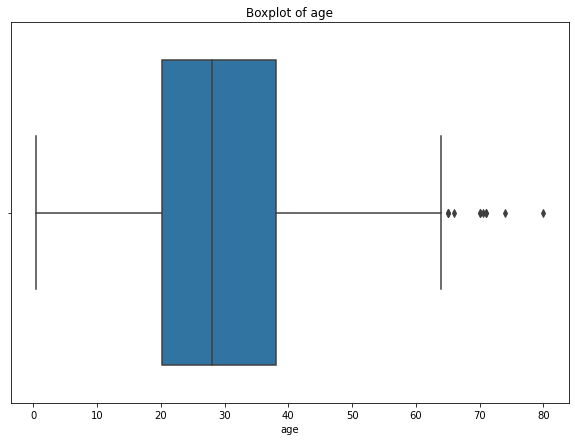

In [10]:
plt.hist(df["age"])
plt.xlabel("age")
plt.ylabel("Frequency")
plt.title("Histogram of " + "age")
plt.show()

# Plot boxplot of the target variable
fig = plt.figure(figsize =(10, 7))
sns.boxplot(x=df["age"])
plt.xlabel("age")
plt.title("Boxplot of " + "age")
plt.show()

### Bivariate analysis using age and fare

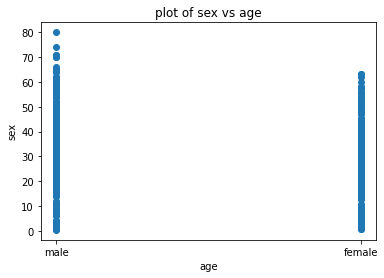

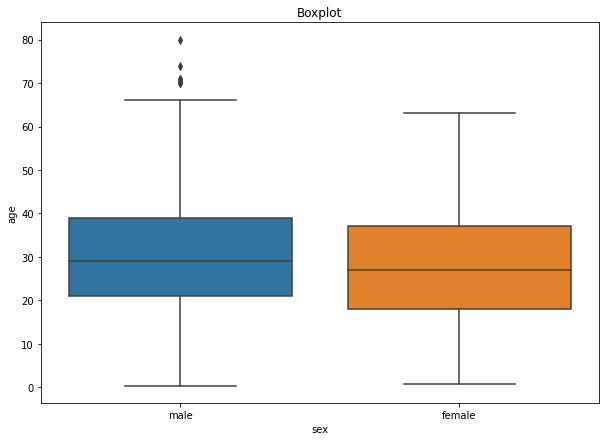

In [18]:
plt.scatter(df["sex"],df["age"])
plt.xlabel("age")
plt.ylabel("sex")
plt.title("plot of " + "sex vs age")
plt.show()

# Plot boxplot of the target variable
fig = plt.figure(figsize =(10, 7))
sns.boxplot(x=df["sex"],y=df["age"])
plt.xlabel("sex")
plt.ylabel("age")
plt.title("Boxplot")
plt.show()

### Multivariate analysis

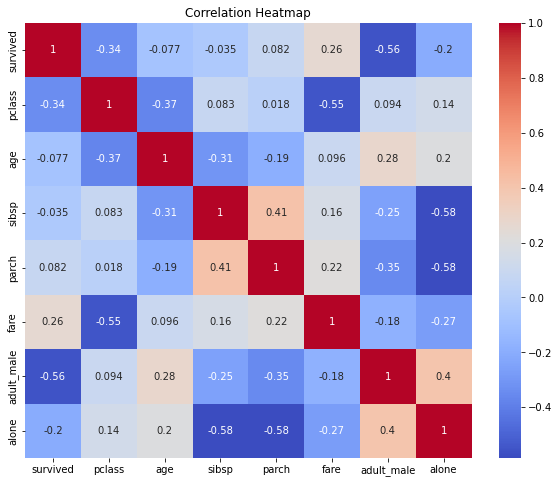

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Perform descriptive statistics on the dataset.

In [17]:
 descriptive_stats = df.describe()
print(descriptive_stats)

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


### Handle the Missing values.

In [20]:
df = df.dropna()
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


### Find and replace outliers in column

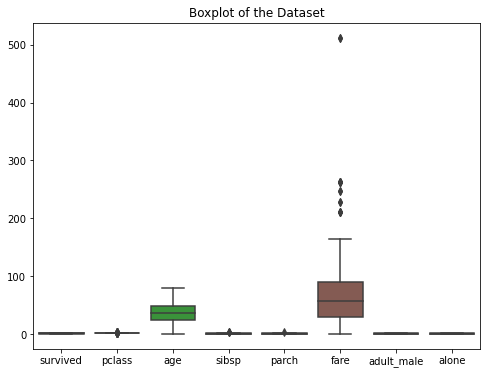

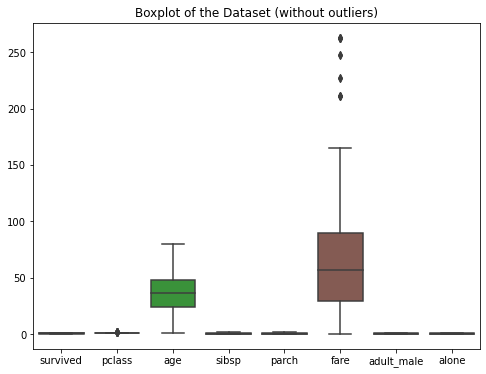

In [31]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.title('Boxplot of the Dataset')
plt.show()

numerical_columns = df.select_dtypes(include=[np.number])

z_scores = (numerical_columns - numerical_columns.mean()) / numerical_columns.std()

threshold = 3

df_no_outliers = df.copy()
for column in numerical_columns.columns:
    column_values = df_no_outliers[column]
    column_z_scores = z_scores[column]
    median = column_values.median()
    df_no_outliers[column] = np.where(np.abs(column_z_scores) > threshold, median, column_values)


plt.figure(figsize=(8, 6))
sns.boxplot(data=df_no_outliers)
plt.title('Boxplot of the Dataset (without outliers)')
plt.show()


### Check for Categorical columns and perform encoding.

In [33]:
categorical_columns = df.select_dtypes(include=["object"]).columns
print(categorical_columns)

Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')


In [34]:
df_encoded = pd.get_dummies(df, columns=categorical_columns)
df_encoded


,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,...,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
1,1,1,38.0,1,0,71.2833,False,False,1,0,...,1,0,0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,False,False,1,0,...,1,0,0,0,0,0,0,1,0,1
6,0,1,54.0,0,0,51.8625,True,True,0,1,...,0,0,1,0,0,0,0,1,1,0
10,1,3,4.0,1,1,16.7000,False,False,1,0,...,0,0,0,0,1,0,0,1,0,1
11,1,1,58.0,0,0,26.5500,False,True,1,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542,False,False,1,0,...,0,1,0,0,0,0,0,1,0,1
872,0,1,33.0,0,0,5.0000,True,True,0,1,...,0,0,0,0,0,0,0,1,1,0
879,1,1,56.0,0,1,83.1583,False,False,1,0,...,1,0,0,0,0,1,0,0,0,1
887,1,1,19.0,0,0,30.0000,False,True,1,0,...,0,0,0,0,0,0,0,1,0,1


In [45]:
df.head()
print(list(df.columns))

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


In [55]:
y = df.drop('survived', axis=1)  # Independent variables (features)

x=[]
j=0
for i in list(df.columns):
    x.append(i)
    
# Print the independent variables
print(df.head())

# Print the dependent variable
print(y.head())


    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1          1       1  female  38.0      1      0  71.2833        C  First   
3          1       1  female  35.0      1      0  53.1000        S  First   
6          0       1    male  54.0      0      0  51.8625        S  First   
10         1       3  female   4.0      1      1  16.7000        S  Third   
11         1       1  female  58.0      0      0  26.5500        S  First   

      who  adult_male deck  embark_town alive  alone  
1   woman       False    C    Cherbourg   yes  False  
3   woman       False    C  Southampton   yes  False  
6     man        True    E  Southampton    no   True  
10  child       False    G  Southampton   yes  False  
11  woman       False    C  Southampton   yes   True  
    pclass     sex   age  sibsp  parch     fare embarked  class    who  \
1        1  female  38.0      1      0  71.2833        C  First  woman   
3        1  female  35.0      1      0  53.1000        S  F

In [60]:
from sklearn.preprocessing import MinMaxScaler


In [61]:
name=df.columns
name

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [63]:
scale=MinMaxScaler()
x = df.select_dtypes(include=[np.number])
X_scaled=scale.fit_transform(x)
X_scaled


array([[1.        , 0.        , 0.46889226, 0.33333333, 0.        ,
        0.13913574],
       [1.        , 0.        , 0.43095599, 0.33333333, 0.        ,
        0.1036443 ],
       [0.        , 0.        , 0.67121902, 0.        , 0.        ,
        0.10122886],
       ...,
       [1.        , 0.        , 0.69650986, 0.        , 0.25      ,
        0.16231419],
       [1.        , 0.        , 0.22862924, 0.        , 0.        ,
        0.0585561 ],
       [1.        , 0.        , 0.31714719, 0.        , 0.        ,
        0.0585561 ]])

In [66]:
X=pd.DataFrame(X_scaled,columns=x.columns)
X

,survived,pclass,age,sibsp,parch,fare
0,1.0,0.0,0.468892,0.333333,0.00,0.139136
1,1.0,0.0,0.430956,0.333333,0.00,0.103644
2,0.0,0.0,0.671219,0.000000,0.00,0.101229
3,1.0,1.0,0.038948,0.333333,0.25,0.032596
4,1.0,0.0,0.721801,0.000000,0.00,0.051822
...,...,...,...,...,...,...
177,1.0,0.0,0.582701,0.333333,0.25,0.102579
178,0.0,0.0,0.405665,0.000000,0.00,0.009759
179,1.0,0.0,0.696510,0.000000,0.25,0.162314
180,1.0,0.0,0.228629,0.000000,0.00,0.058556


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [69]:
X_train.head()

,survived,pclass,age,sibsp,parch,fare
257,1,1,30.0,0,0,86.5000
487,0,1,58.0,0,0,29.7000
632,1,1,32.0,0,0,30.5000
434,0,1,50.0,1,0,55.9000
299,1,1,50.0,0,1,247.5208


In [70]:
X_test.head()

,survived,pclass,age,sibsp,parch,fare
484,1,1,25.0,1,0,91.0792
110,0,1,47.0,0,0,52.0000
195,1,1,58.0,0,0,146.5208
496,1,1,54.0,1,0,78.2667
889,1,1,26.0,0,0,30.0000


In [71]:
y_train

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
257,1,female,30.0,0,0,86.5000,S,First,woman,False,B,Southampton,yes,True
487,1,male,58.0,0,0,29.7000,C,First,man,True,B,Cherbourg,no,True
632,1,male,32.0,0,0,30.5000,C,First,man,True,B,Cherbourg,yes,True
434,1,male,50.0,1,0,55.9000,S,First,man,True,E,Southampton,no,False
299,1,female,50.0,0,1,247.5208,C,First,woman,False,B,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1,male,47.0,0,0,34.0208,S,First,man,True,D,Southampton,no,True
336,1,male,29.0,1,0,66.6000,S,First,man,True,C,Southampton,no,False
581,1,female,39.0,1,1,110.8833,C,First,woman,False,C,Cherbourg,yes,False
268,1,female,58.0,0,1,153.4625,S,First,woman,False,C,Southampton,yes,False


In [72]:
y_test

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
484,1,male,25.00,1,0,91.0792,C,First,man,True,B,Cherbourg,yes,False
110,1,male,47.00,0,0,52.0000,S,First,man,True,C,Southampton,no,True
195,1,female,58.00,0,0,146.5208,C,First,woman,False,B,Cherbourg,yes,True
496,1,female,54.00,1,0,78.2667,C,First,woman,False,D,Cherbourg,yes,False
889,1,male,26.00,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
806,1,male,39.00,0,0,0.0000,S,First,man,True,A,Southampton,no,True
27,1,male,19.00,3,2,263.0000,S,First,man,True,C,Southampton,no,False
689,1,female,15.00,0,1,211.3375,S,First,child,False,B,Southampton,yes,False
319,1,female,40.00,1,1,134.5000,C,First,woman,False,E,Cherbourg,yes,False
369,1,female,24.00,0,0,69.3000,C,First,woman,False,B,Cherbourg,yes,True
